# Examen parcial 1
Alumna: Anel Mendiola

Modelos computacionales 2

## Ejercicio 1

### Reproducir el análisis de PCA aplicado al Iris dataset, utilizando 3 componentes

1. Indicar el porcentaje de la información utilizando los 3 componentes principales
2. Hacer el scatter 3D de los datos proyectados, con cualquiera de los 3 métodos

*Nota: En el dataset Iris, la variable "Species" era descartada*

In [110]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

### Cargar el dataset

In [159]:
path = r"C:\Users\anmen\OneDrive\Escritorio\Repo profe 2025\iris.csv"

### definimos el path y cargamos los primeros valores

In [84]:
df = pd.read_csv(path)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Descartar la columna 'Species'

In [85]:
descartar = df.drop(columns=['Species'])

### Aplicar PCA

In [86]:
pca = PCA(n_components=3)
componentesp = pca.fit_transform(descartar)

### Porcentaje de varianza explicada por cada componente principal

In [87]:
varianza = pca.explained_variance_ratio_
varianza_total = varianza.sum()

### Crear el scatter plot 3D

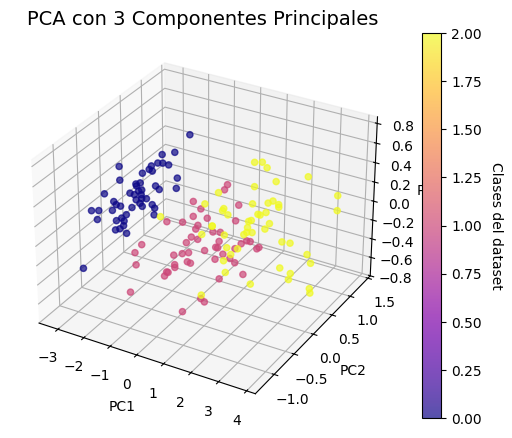

La varianza total es: 0.9947878161267253


In [111]:
labels = iris.target
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos proyectados en los 3 componentes principales
sc = ax.scatter(componentesp[:, 0], componentesp[:, 1], componentesp[:, 2], c=labels, cmap='plasma', alpha=0.7)

# Añadir una barra de colores para identificar las clases
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Clases del dataset', rotation=270, labelpad=15)

# Etiquetas y título
ax.set_title('PCA con 3 Componentes Principales', fontsize=14)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()
print('La varianza total es:', varianza_total)

## Ejercicio 2

### 2. Realizar el análisis de PCA utilizando el dataset Brain_tumor, archivo Brain tumor.csv 

1. ¿Qué notan de extraño con la columna "Coarseness al normalizar el dataset?
2. Determinar el porcentaje de aporte de cada vector propio 
3. Determinar cuántos componentes principales son necesarios para obtener al menos un 90% de datos 
4. Realizar la proyección de la data original al espacio reducido mediante 2 métodos y comparar resultados 
5. Hacer la comparación de los pairplot con la data original y la data proyectada 

*Nota: en el dataset Brain_tumor, descartar la variable 'Class'*

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

**cargar dataset**

In [157]:
path = r"C:\Users\anmen\OneDrive\Escritorio\Repo profe 2025\Brain Tumor.csv"

**definimos el path y cargamos los primeros valores**

In [158]:
df1 = pd.read_csv(path)

df1 = df1.select_dtypes(include=[np.number])

cerebro = df1.drop(columns=['Class'], errors='ignore').values
labels = df1['Class'].values if 'Class' in df1.columns else None

scaler = StandardScaler()
cerebro_scaled = scaler.fit_transform(cerebro)

print(df1.head())

   Class      Mean     Variance  Standard Deviation   Entropy  Skewness  \
0      0  6.535339   619.587845           24.891522  0.109059  4.276477   
1      0  8.749969   805.957634           28.389393  0.266538  3.718116   
2      1  7.341095  1143.808219           33.820234  0.001467  5.061750   
3      1  5.958145   959.711985           30.979219  0.001477  5.677977   
4      0  7.315231   729.540579           27.010009  0.146761  4.283221   

    Kurtosis    Contrast    Energy       ASM  Homogeneity  Dissimilarity  \
0  18.900575   98.613971  0.293314  0.086033     0.530941       4.473346   
1  14.464618   63.858816  0.475051  0.225674     0.651352       3.220072   
2  26.479563   81.867206  0.031917  0.001019     0.268275       5.981800   
3  33.428845  151.229741  0.032024  0.001026     0.243851       7.700919   
4  19.079108  174.988756  0.343849  0.118232     0.501140       6.834689   

   Correlation     Coarseness  
0     0.981939  7.458341e-155  
1     0.988834  7.458341e-15

### 1. ¿Qué notas de raro en la columna 'Coarseness'?

Todos los valores son iguales, puede indicar que hay falta de varianza, errores en los cálculos de coarseness, problemas de normalización, faltan datos

### 2. Determinar el porcentaje de aporte de cada vector propio

In [109]:
pca = PCA()
cerebro_pca = pca.fit_transform(cerebro_scaled)
exp_var = pca.explained_variance_ratio_*100
print("Porcentaje de varianza explicada por cada componente:")
print(exp_var)

Porcentaje de varianza explicada por cada componente:
[4.08816773e+01 3.12991477e+01 1.28742637e+01 6.26484623e+00
 4.78447253e+00 2.00054187e+00 1.07659606e+00 3.34276945e-01
 2.55305629e-01 1.39156675e-01 8.91780975e-02 5.37250098e-04
 0.00000000e+00]


### 3. Calcular el número de componentes necesarios para explicar al menos el 90% de la varianza

In [85]:
cum_var = np.cumsum(exp_var)
n_90 = np.argmax(cum_var >= 0.90) + 1
print(f"Número de componentes para explicar al menos el 90% de la varianza: {n_90}")

Número de componentes para explicar al menos el 90% de la varianza: 4


### 4. Realizar la proyección de la data original al espacio reducido mediante 2 métodos y comparar resultados
Aplicar otra técnica alternativa: Truncated SVD (similar a PCA pero más eficiente para datos normalizados)

In [ ]:
**Método 1: usando PCA**

In [121]:
pca_reducido = PCA(n_90)
df_pca = pca_reducido.fit_transform(cerebro_scaled)

**Método 2: usando truncated svd**

In [122]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_90)
df_svd = svd.fit_transform(cerebro_scaled)

**Comparar las variaciones explicadas en ambos métodos: graficas**

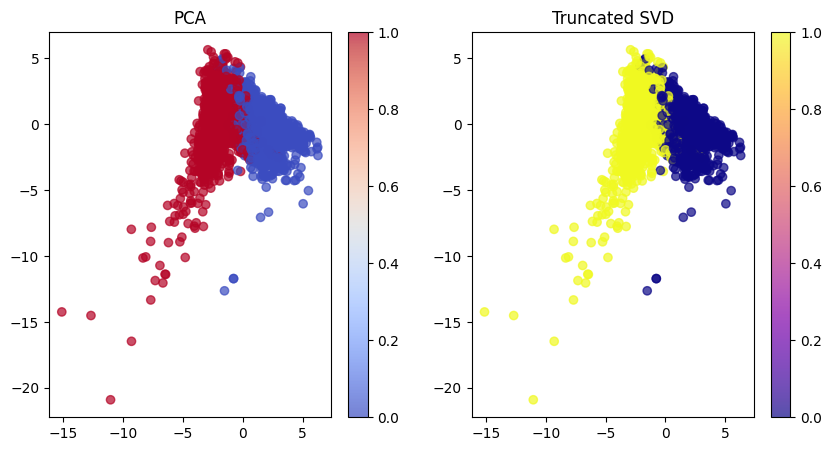

In [150]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#la gráfica de pca
scatter1 = axes[0].scatter(cerebro_pca[:, 0], cerebro_pca[:, 1], c=labels, cmap='coolwarm', alpha=0.7)
axes[0].set_title('PCA')
fig.colorbar(scatter1, ax=axes[0])

#la gráfica de Truncated SVD
scatter2 = axes[1].scatter(df_svd[:, 0], df_svd[:, 1], c=labels, cmap='plasma', alpha=0.7)
axes[1].set_title('Truncated SVD')
fig.colorbar(scatter2, ax=axes[1])

plt.show()

**Comparamos las varianzas**

In [125]:
varianza_pca = np.sum(pca_reducido.explained_variance_ratio_)
varianza_svd = np.sum(svd.explained_variance_ratio_)

print("La varianza de pca es: ", varianza_pca)
print("La varianza de varianza_svd: ", varianza_svd)

La varianza de pca es:  0.9131993494320665
La varianza de varianza_svd:  0.9131993494320689


### 5. Hacer la comparación de los pairplot con la data original y la data proyectada

**Crear un dataframe de los datos originales**

In [155]:
df_subset = pd.DataFrame(cerebro_scaled[:, :4], columns=df1.columns[:4]) # datos originales
df_pca1 = pd.DataFrame(df_pca, columns=[f"PC{i+1}" for i in range(n_90)]) # datos con pca
df_svd1 = pd.DataFrame(df_svd, columns=[f"PC{i+1}" for i in range(n_90)]) # datos con svd

**Grafica de los datos originales**

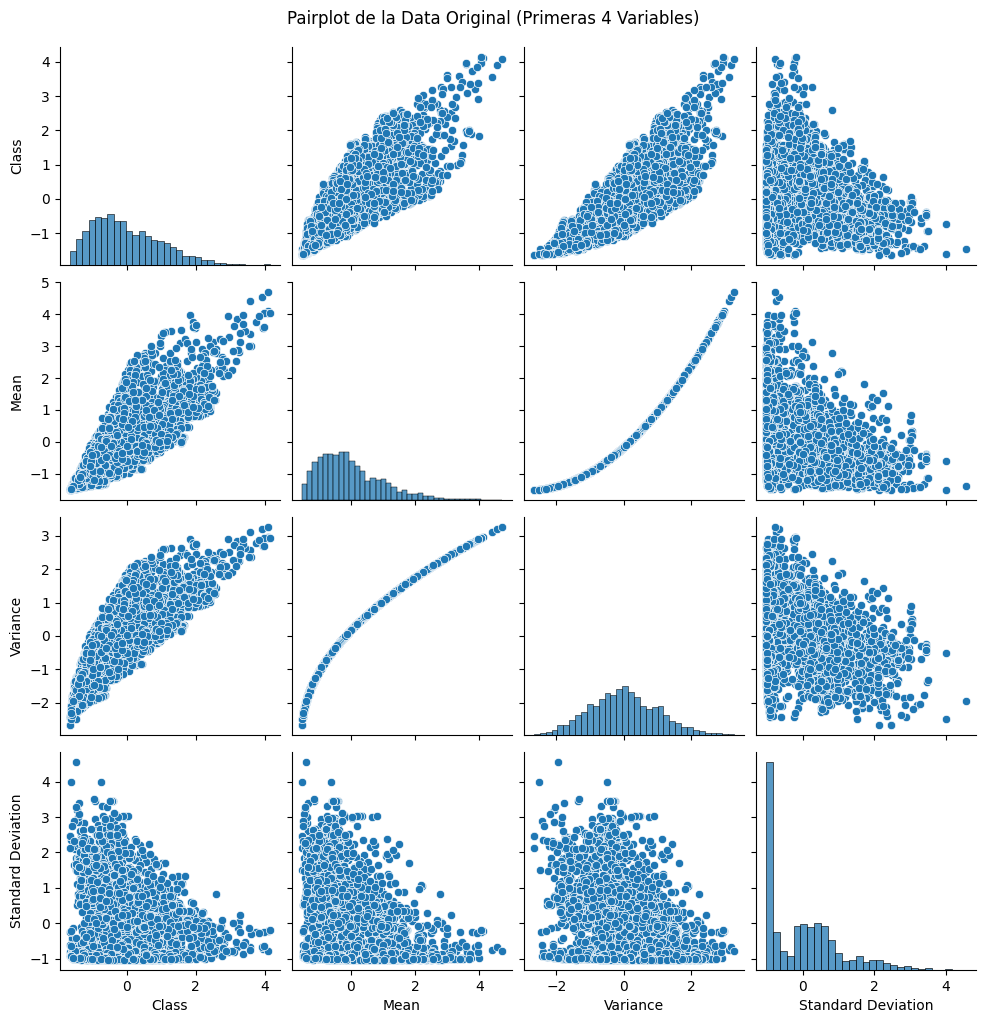

In [145]:
sns.pairplot(df_subset)
plt.suptitle("Pairplot de la Data Original (Primeras 4 Variables)", y=1.02)
plt.show()

**Graficar los datos reducidos por PCA**

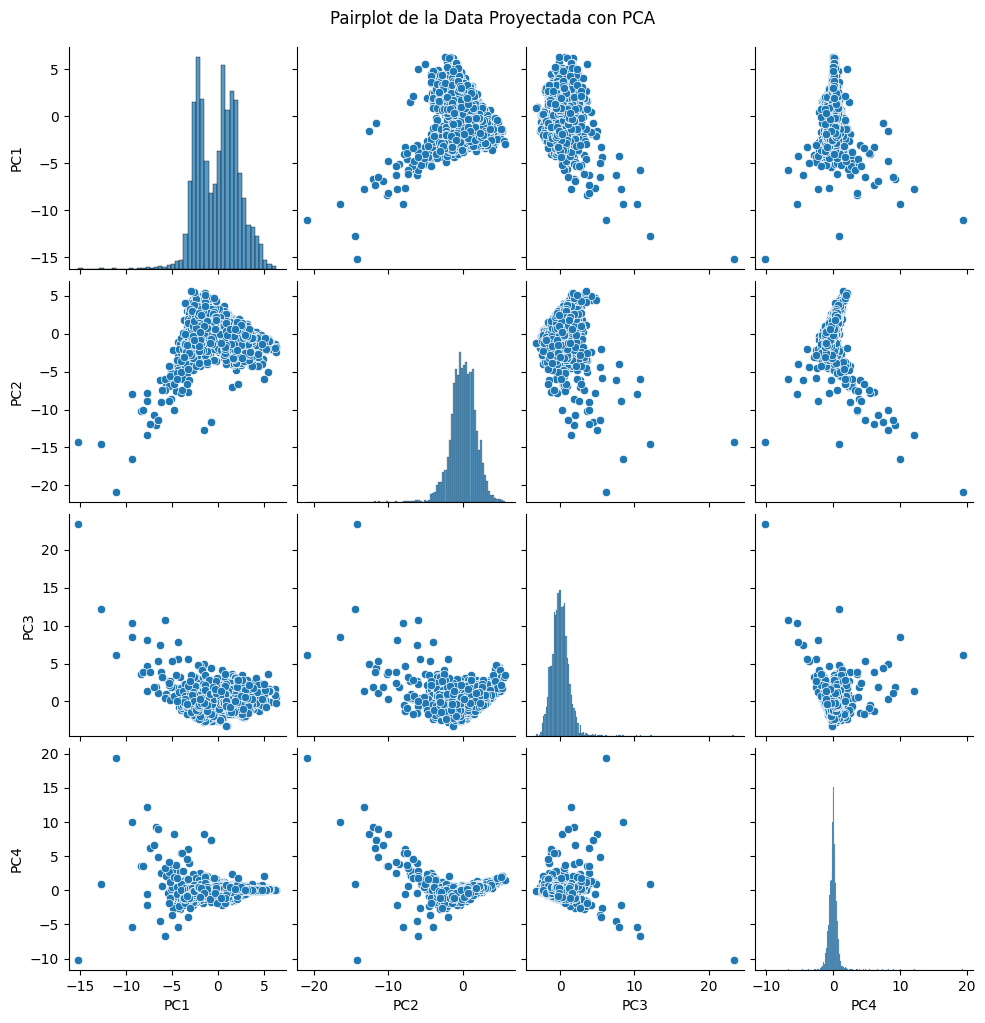

In [148]:
sns.pairplot(df_pca1)
plt.suptitle("Pairplot de la Data Proyectada con PCA", y=1.02)
plt.show()

**Grafica con los datos reducidos por SVD**

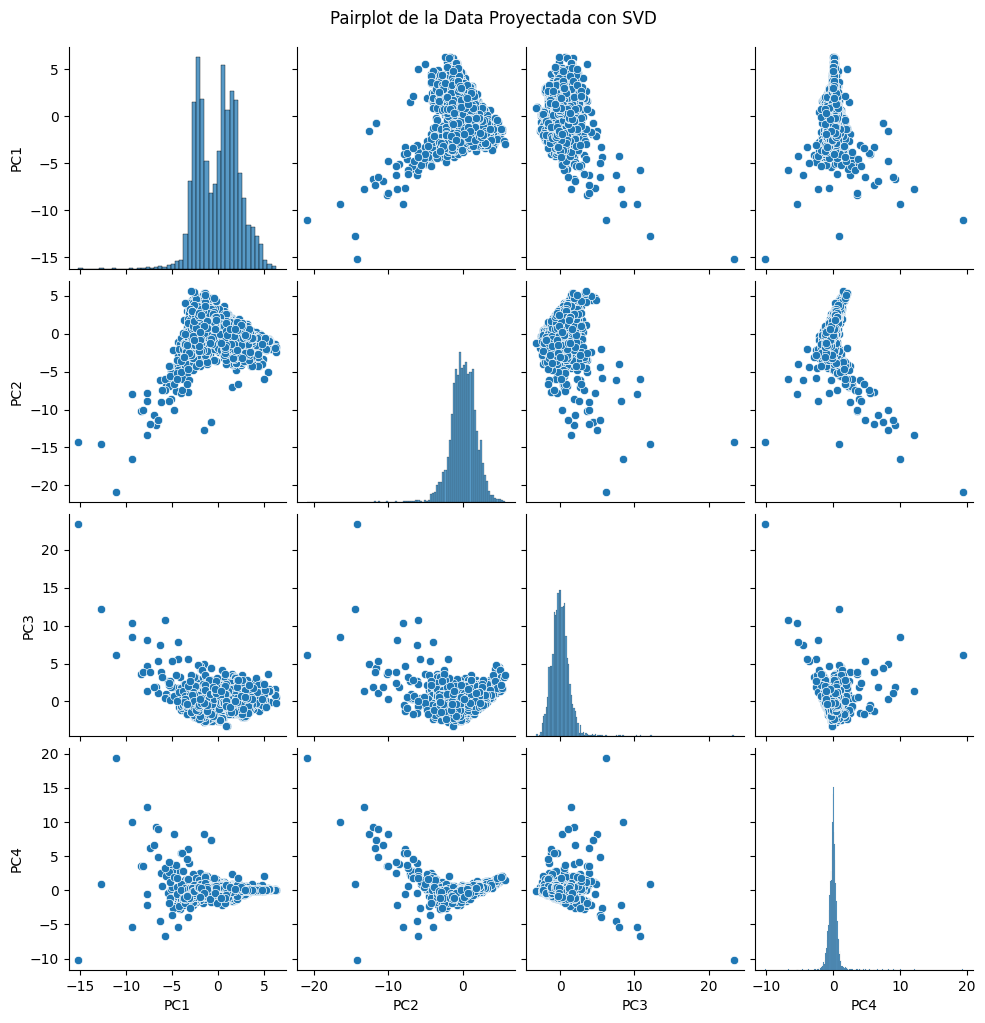

In [156]:
sns.pairplot(df_svd1)
plt.suptitle("Pairplot de la Data Proyectada con SVD", y=1.02)
plt.show()